# Objective

In the last Lab Exercise, you have identified and analyzed some of the most relevant numeric variables in this dataset,
which may affect the sale price of a house, and hence, will probably be most relevant in predicting “SalePrice”. In this
Lab Exercise, you will utilize some of those numeric variables to perform Linear Regression and predict “SalePrice”.

Typical steps to follow while building a supervised machine learning model on a given dataset:

o Partition the labeled dataset into two random portions – 80% to Train the model and 20% to Test the model.

o Fit the desired supervised machine learning model on the Train set to predict response using the predictors.

o Predict response using the predictors on the Test set using the machine learning model fit on the Train data.

o Check the Goodness of Fit of the model on Train set using R^2 and Prediction Accuracy on Test set using MSE.

Marks distribution

3 points for Problem 1 2 points for train-test set and regression in (a) + 1 point for metrics in (b)

3 points for Problem 2 2 points for the two regressions + 1 point for comparison and justifications

4 points for Problem 3 2 points for outlier removal in (a) + 1 point for model in (b) + 1 point for (c)

## Importing the Essential Libraries and data

In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

house_prices = pd.read_csv('train.csv')
house_prices

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
print(type(house_prices))
print(house_prices.shape)

<class 'pandas.core.frame.DataFrame'>
(1460, 81)


# Problems

### Problem 1 : Predicting SalePrice using GrLivArea

Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71.
In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train
set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.


Hints and Pointers

o If you take just the first 80% of the data as train and the next 20% as test, it may not be the best train test split.

o If you obtain the coefficients for the regression line (intercept and coef), it should be easy to plot the line too.

o Goodness of Fit on train depends on the variance you explain, while prediction accuracy depends on the errors.

## Uni-Variate Linear Regression

We will start by setting up a Uni-Variate Linear Regression problem.   

Response Variable : **SalePrice**     
Predictor Feature : **GrLivArea**    

> Regression Model : SalePrice = $a$ $\times$ GrLivArea + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

In [75]:
SalePrice = house_prices[['SalePrice']]
GrLivArea = house_prices[['GrLivArea']]

Set up the regression problem with Train and Test datasets.   
Train Set with 1168 samples (80%) and Test Set with 332 samples (20%).

To increase randomness and reduce biasness, we will take the data from the middle instead of taking all of the training dataset from the front.

In [60]:
# Training GrLivArea Set : 1168 samples
GrLivArea_train = GrLivArea[292:1461]
SalePrice_train = SalePrice[292:1461]

# Test GrLivArea Set : 292 samples
GrLivArea_test = GrLivArea[0:292]
SalePrice_test = SalePrice[0:292]

# Check the sample sizes
print("Train Set :", GrLivArea_train.shape, SalePrice_train.shape)
print("Test Set  :", GrLivArea_test.shape, SalePrice_test.shape)
print("Total: ",1168+292)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)
Total:  1460


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [61]:
# Summary Statistics for GrLivArea_train
GrLivArea_train.describe()

,GrLivArea
count,1168.000000
mean,1514.482021
std,533.657495
min,334.000000
25%,1128.000000
50%,1465.000000
75%,1780.250000
max,5642.000000


In [62]:
# Summary Statistics for SalePrice_train
SalePrice_train.describe()

,SalePrice
count,1168.000000
mean,180717.091610
std,80657.857181
min,34900.000000
25%,130000.000000
50%,162000.000000
75%,213310.000000
max,755000.000000


<AxesSubplot:>

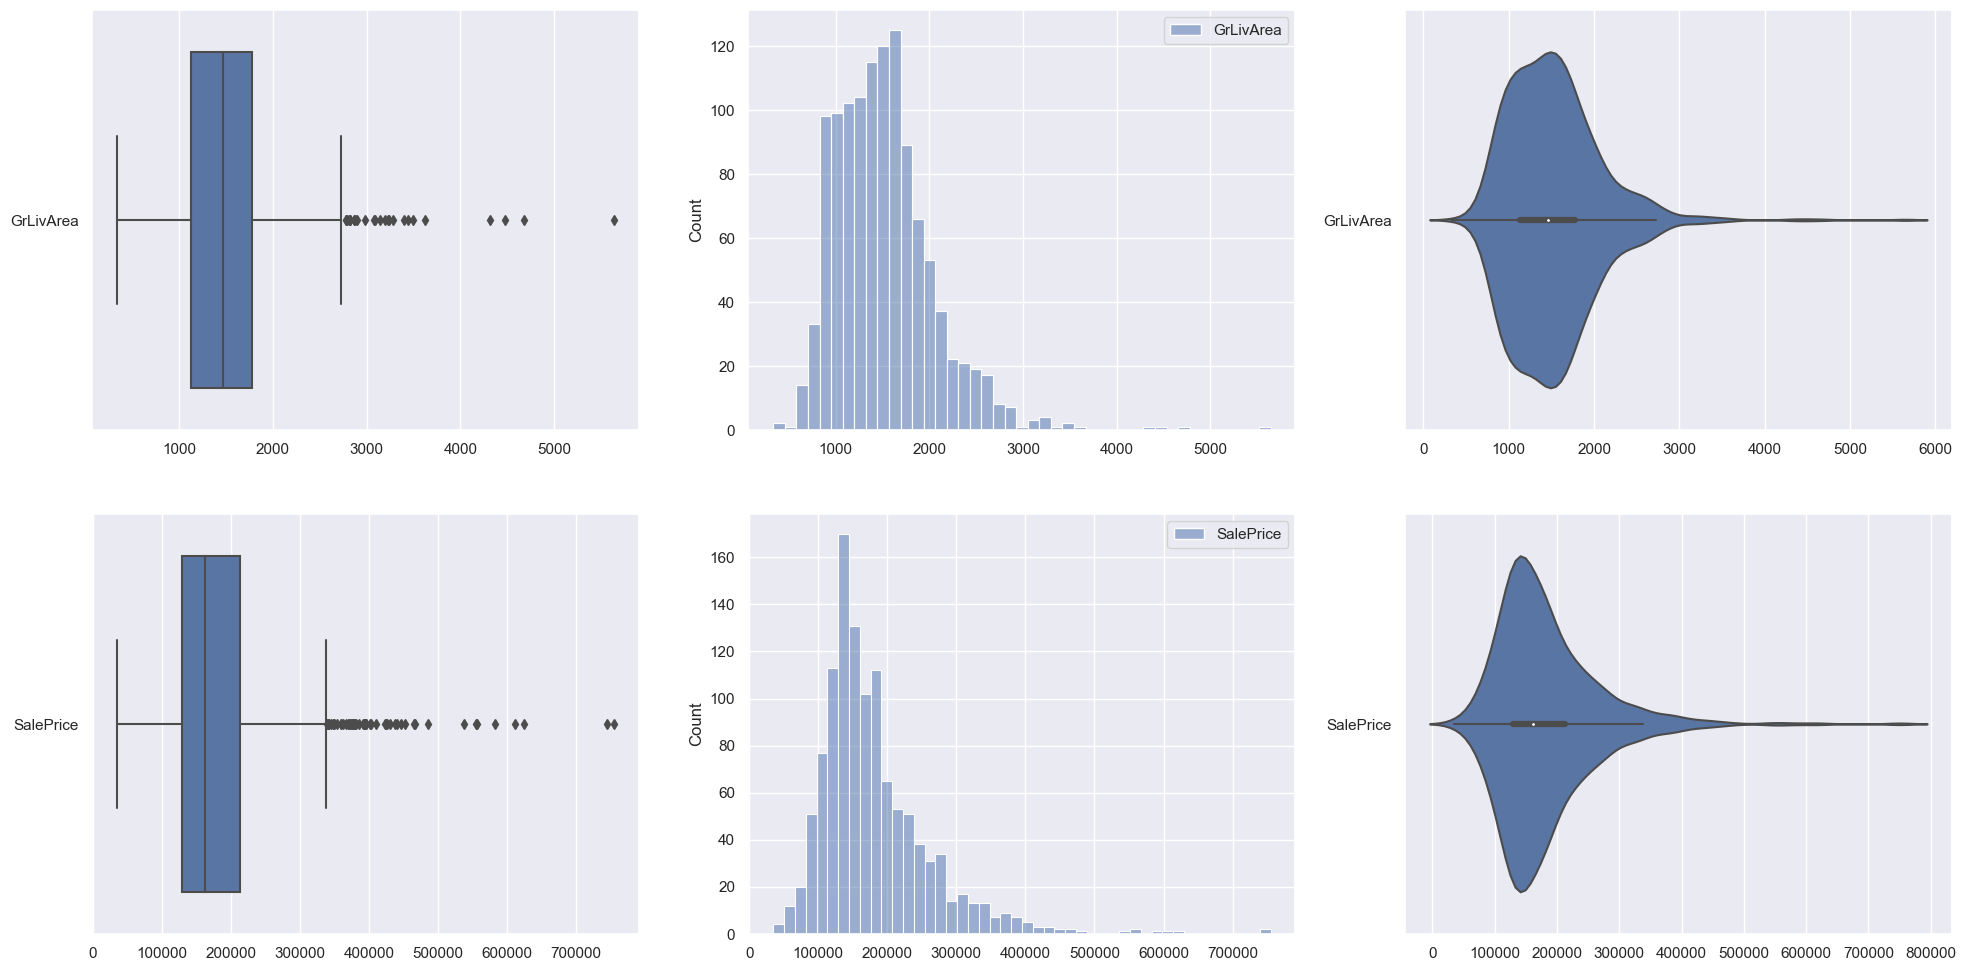

In [63]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = GrLivArea_train, orient = "h", ax = axes[0,0])
sb.histplot(data = GrLivArea_train, ax = axes[0,1])
sb.violinplot(data = GrLivArea_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(data = SalePrice_train, orient = "h", ax = axes[1,0])
sb.histplot(data = SalePrice_train, ax = axes[1,1])
sb.violinplot(data = SalePrice_train, orient = "h", ax = axes[1,2])

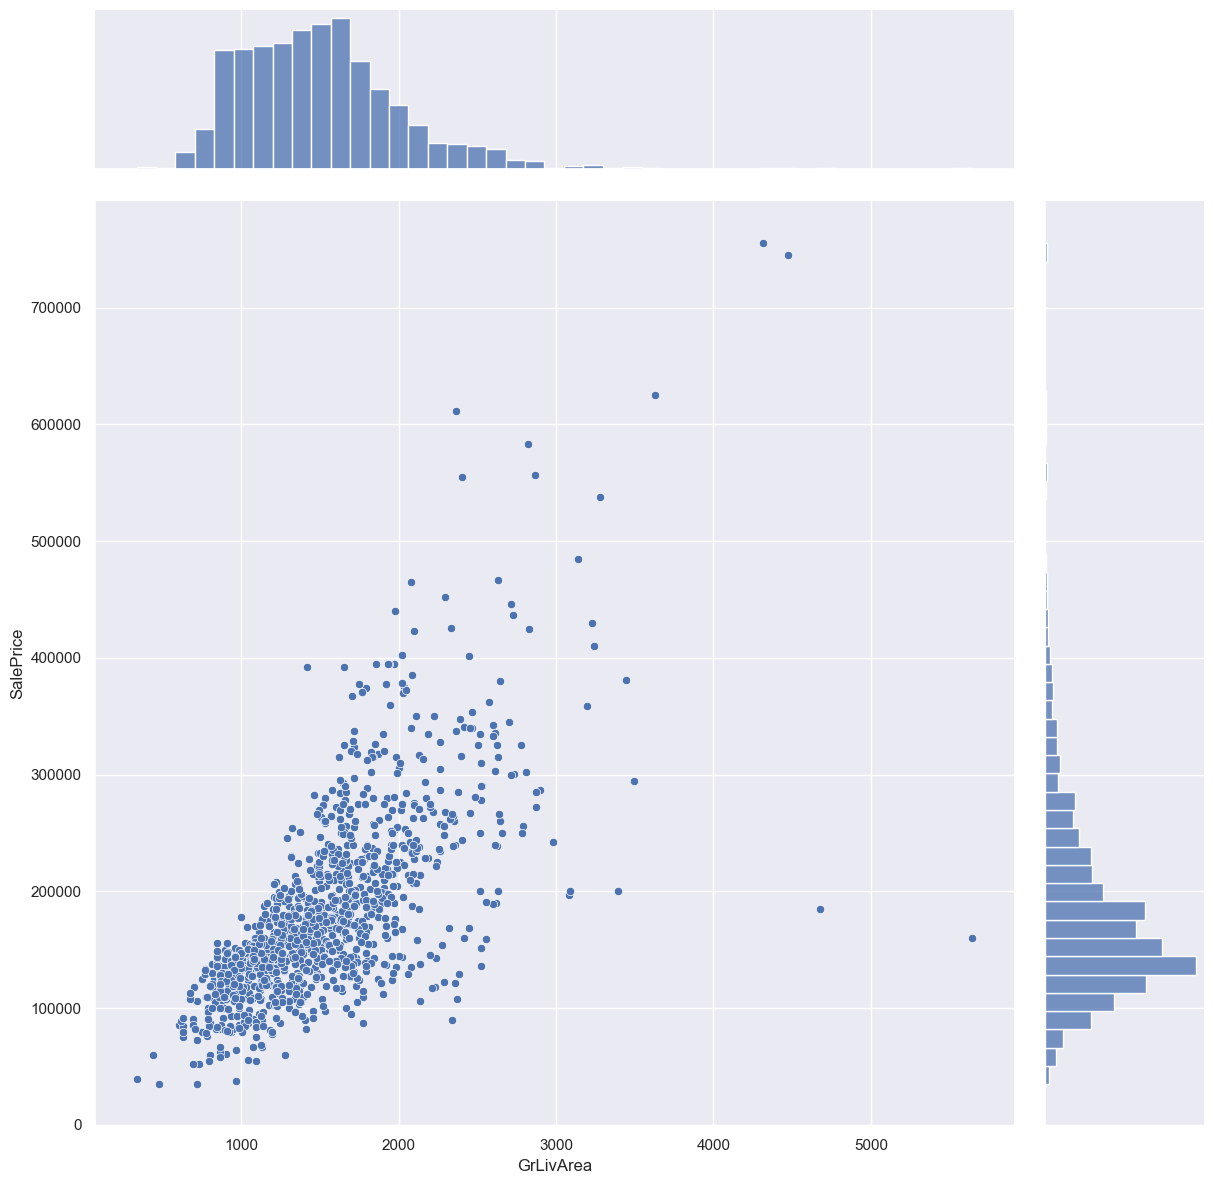

In [64]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([GrLivArea_train, SalePrice_train], axis = 1).reindex(GrLivArea_train.index)

# Jointplot of GrLivArea against SalePrice
sb.jointplot(data = trainDF, x = "GrLivArea", y = "SalePrice", height = 12)

<AxesSubplot:>

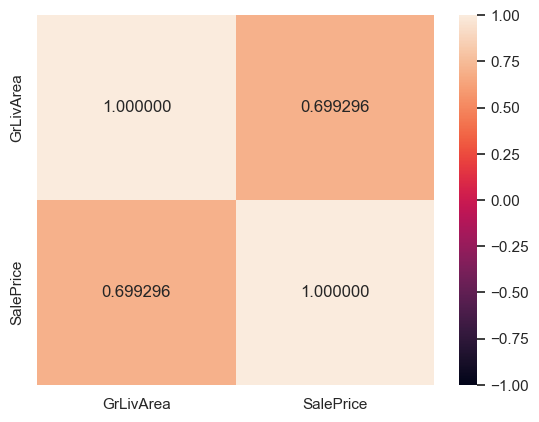

In [65]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".6f")

### Linear Regression using Scikit-Learn

Scikit-Learn(sklearn) will be our de-facto Machine Learning Library in Python.

Import the LinearRegression model from sklearn.linear_model

In [66]:
#Import LinearRegression model from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

Train the Linear Regression model linreg using the Train set.

Use GrLivArea_train as Predictor and SalePrice_train as Response.

In [67]:
# Train the Linear Regression Model
linreg.fit(GrLivArea_train,SalePrice_train)

LinearRegression()

## Coefficients for the regression line (intercept and coef)

You have *trained* the model to fit the following formula.

> Regression Problem : SalePrice = $a$ $\times$ GrLivArea + $b$

Check Intercept ($a$) and Coefficient ($b$) of the regression line.

In [68]:
# Coefficients of the Linear Regression Line.
# linreg.intercept_ and linreg.coef_ functions to find intercept and coefficients respectively
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [20647.41167149]
Coefficients 	: a =  [[105.69269081]]


Plot the Regression Line based on the coefficients-intercept form.

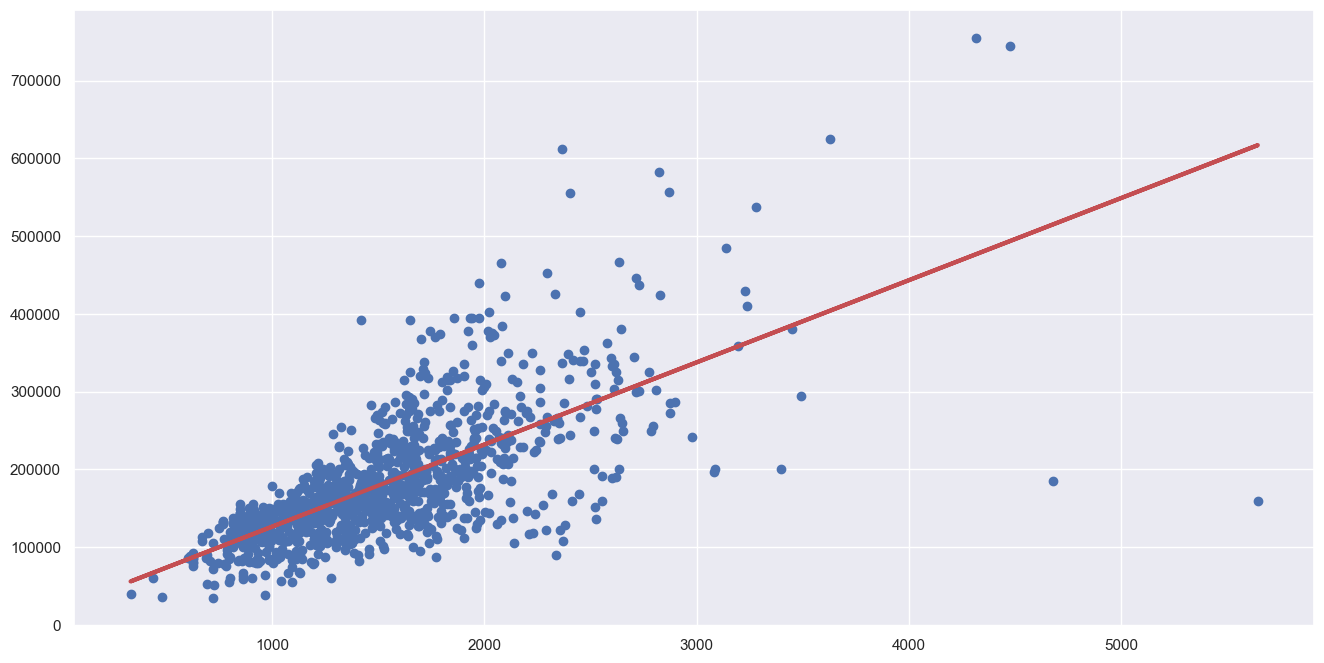

In [69]:
# Formula for the Regression line
regline_x = GrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * GrLivArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_train, SalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

Plot the Regression Line using the Model.

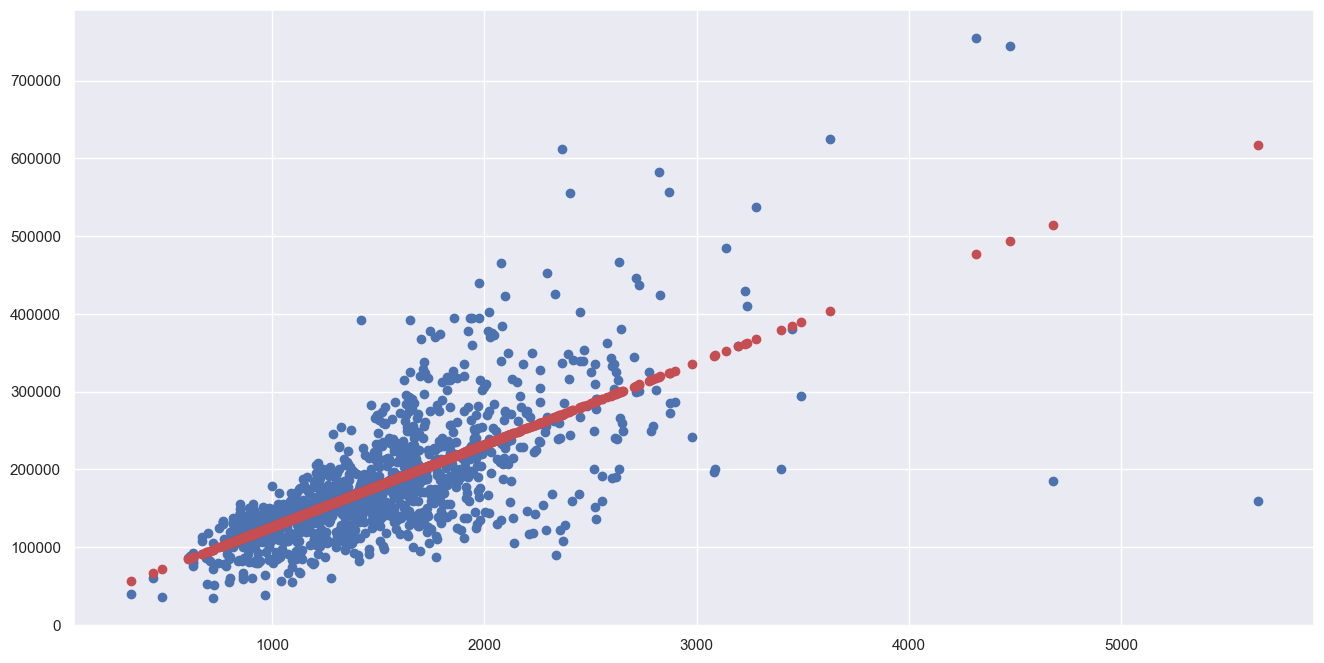

In [70]:
# Predict Total values corresponding to GrLivArea_train
SalePrice_train_pred = linreg.predict(GrLivArea_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_train, SalePrice_train)
plt.scatter(GrLivArea_train, SalePrice_train_pred, color = "r")
plt.show()

#### Goodness of Fit of the Model.

Check how good the prediction are on the Training Set.
Metrics for measuring the prediction: Explained Variance and Mean Squared Error.

In [71]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(GrLivArea_train, SalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(SalePrice_train, SalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.4890145438495552
Mean Squared Error (MSE) 	: 3321466775.5902457
Root Mean Squared Error (RMSE) 	: 57632.16788903785


Test the Linear Regression Model linreg using the Test Set.

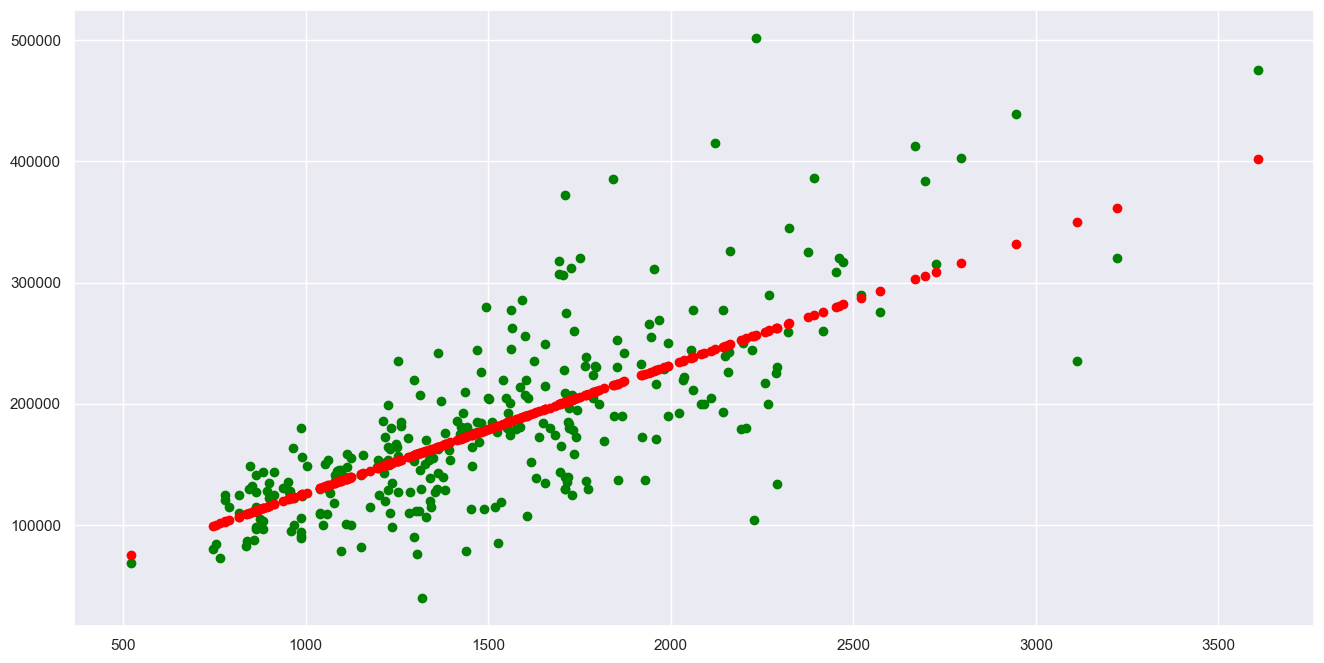

In [73]:
# Predict Total values corresponding to HP Test
SalePrice_test_pred = linreg.predict(GrLivArea_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_test, SalePrice_test, color = "green")
plt.scatter(GrLivArea_test, SalePrice_test_pred, color = "red")
plt.show()

Check how good the predictions are on the Test Set.    
Metrics : Explained Variance and Mean Squared Error.

In [74]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(GrLivArea_test, SalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(SalePrice_test, SalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5632726084663093
Mean Squared Error (MSE) 	: 2416250987.610844
Root Mean Squared Error (RMSE) 	: 49155.37597873547


In this case, Goodness of Fit on train depends on the variance you explain, while prediction accuracy depends on the errors, ie. the explained variance (R^2) and Mean Squared Error (MSE).

### Problem 2 : Predicting SalePrice using Other Variables

Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice
using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

Hints and Pointers

o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway.

o Optional: You may think of writing a simple Python function to do regression on some variables in a given dataset.

In [98]:
TotalBsmtSF = house_prices[['TotalBsmtSF']]
GarageArea = house_prices[['GarageArea']]
SalePrice = house_prices[['SalePrice']]

# Training GrLivArea Set : 1168 samples
TotalBsmtSF_train = TotalBsmtSF[0:1168]
GarageArea_train = GarageArea[0:1168]
SalePrice_train = SalePrice[0:1168]

# Test GrLivArea Set : 292 samples
TotalBsmtSF_test = TotalBsmtSF[1168:1460]
GarageArea_test = GarageArea[1168:1460]
SalePrice_test = SalePrice[1168:1460]

### Tackling the TotalBsmtSF first:

We will start by setting up a Uni-Variate Linear Regression problem.   

Response Variable : **SalePrice**     
Predictor Feature : **TotalBsmtSF**    

> Regression Model : SalePrice = $a$ $\times$ TotalBsmtSF + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

No need to plot all the boxplots and joinplots, just tackle the Explained Variance and Prediction Accuracy directly.

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)
Total: 1460 

Intercept 	: b =  [53984.78430742]
Coefficients 	: a =  [[120.17206903]]


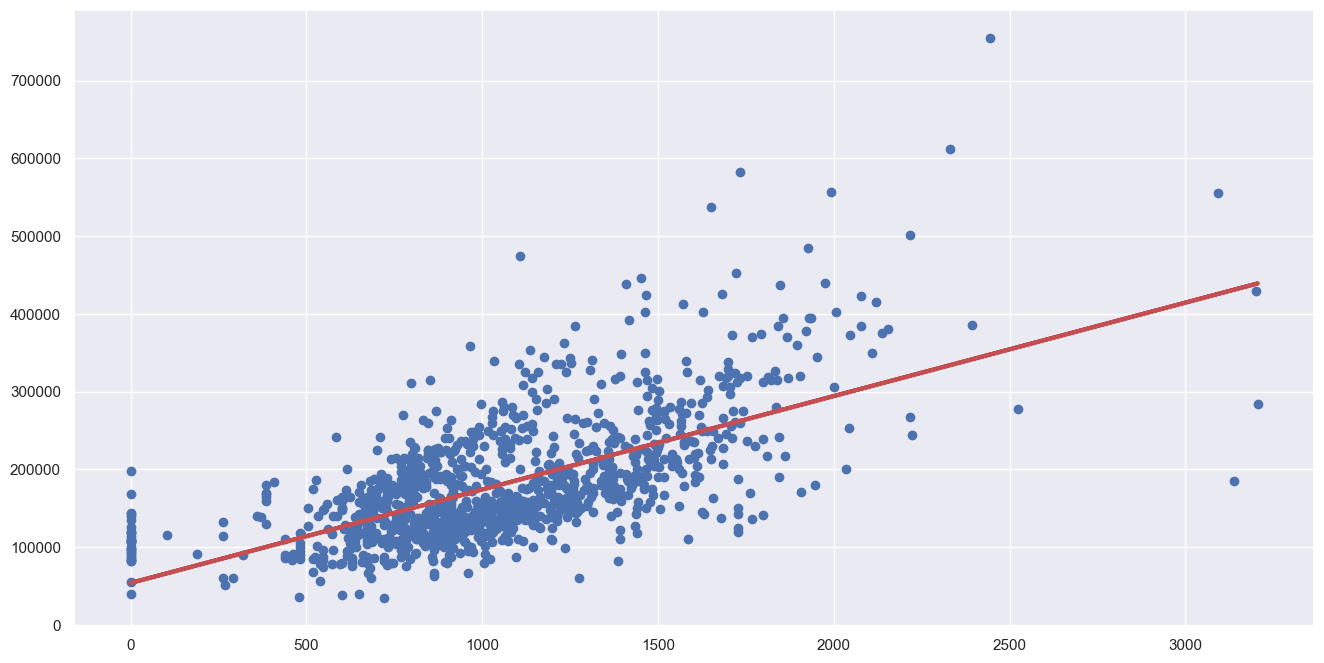

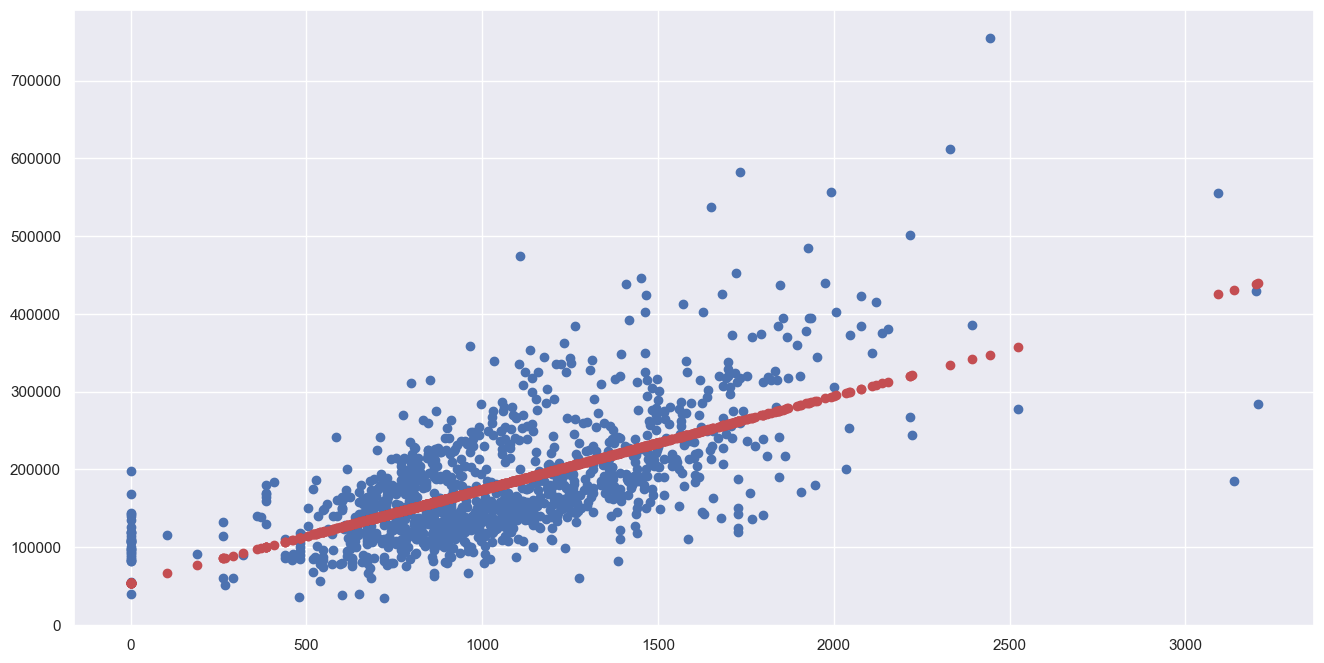

Explained Variance (R^2) 	: 0.40837886662861267
Mean Squared Error (MSE) 	: 3671953251.0542755
Root Mean Squared Error (RMSE) 	: 60596.643892663524

 Test the Linear Regression model linreg using the Test Set. 
 
Explained Variance (R^2) 	: 0.24638464383789505
Mean Squared Error (MSE) 	: 5053269440.2703495
Root Mean Squared Error (RMSE) 	: 71086.35199720372


In [99]:
# Check the sample sizes
print("Train Set :", TotalBsmtSF_train.shape, SalePrice_train.shape)
print("Test Set  :", TotalBsmtSF_test.shape, SalePrice_test.shape)
print("Total:",1168+292, "\n")

linreg = LinearRegression()

linreg.fit(TotalBsmtSF_train,SalePrice_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = TotalBsmtSF_train
regline_y = linreg.intercept_ + linreg.coef_ * TotalBsmtSF_train

# Plot the Linear Regression line based on the coefficients-intercept form.
f = plt.figure(figsize=(16, 8))
plt.scatter(TotalBsmtSF_train, SalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Predict Total values corresponding to HP Train
SalePrice_train_pred = linreg.predict(TotalBsmtSF_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(TotalBsmtSF_train, SalePrice_train)
plt.scatter(TotalBsmtSF_train, SalePrice_train_pred, color = "r")
plt.show()

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(TotalBsmtSF_train, SalePrice_train))

mse = mean_sq_err(SalePrice_train, SalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

# Check how good the predictions are on the Test Set.    
# Metrics : Explained Variance and Mean Squared Error.

# Predict Total values corresponding to HP Test
print("\n Test the Linear Regression model linreg using the Test Set. \n ")

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(TotalBsmtSF_test, SalePrice_test))
SalePrice_test_pred = linreg.predict(TotalBsmtSF_test)

mse = mean_sq_err(SalePrice_test, SalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

# Tackling the GarageArea next:

We will start by setting up a Uni-Variate Linear Regression problem.   

Response Variable : **SalePrice**     
Predictor Feature : **GarageArea**    

> Regression Model : SalePrice = $a$ $\times$ GarageArea + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

No need to plot all the boxplots and joinplots, just tackle the Explained Variance and Prediction Accuracy directly.

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)
Total: 1460 

Intercept 	: b =  [67619.86963613]
Coefficients 	: a =  [[239.26509537]]


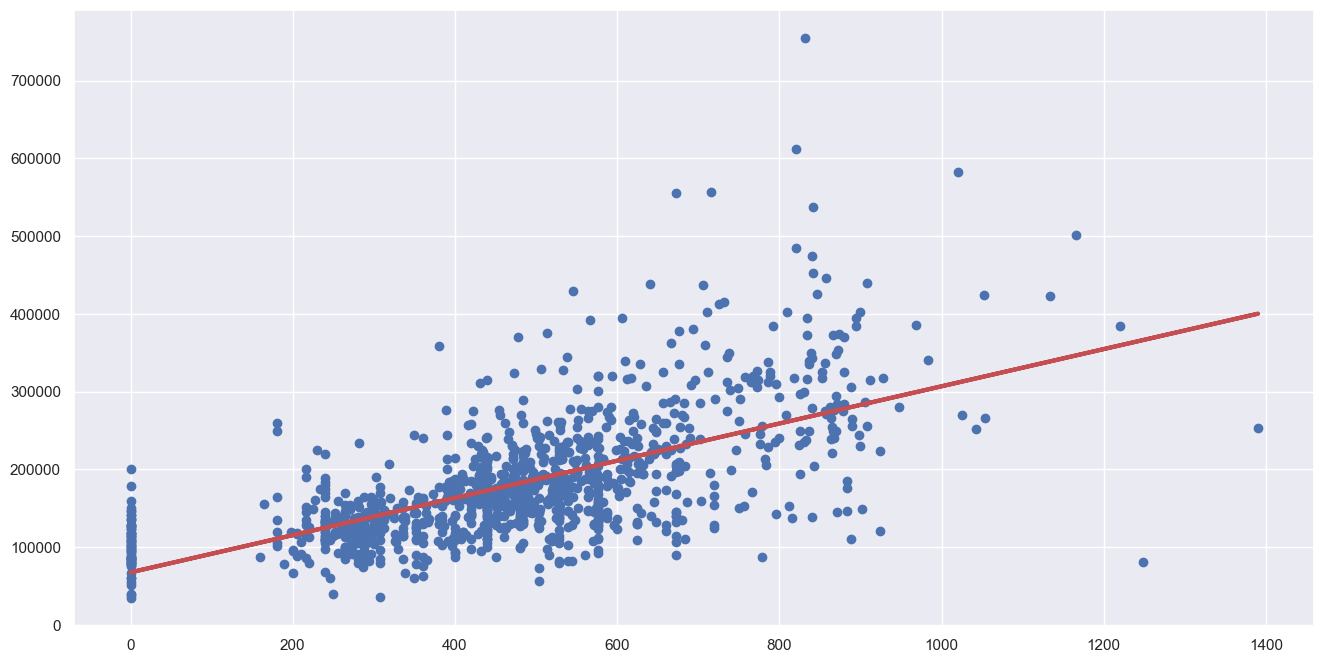

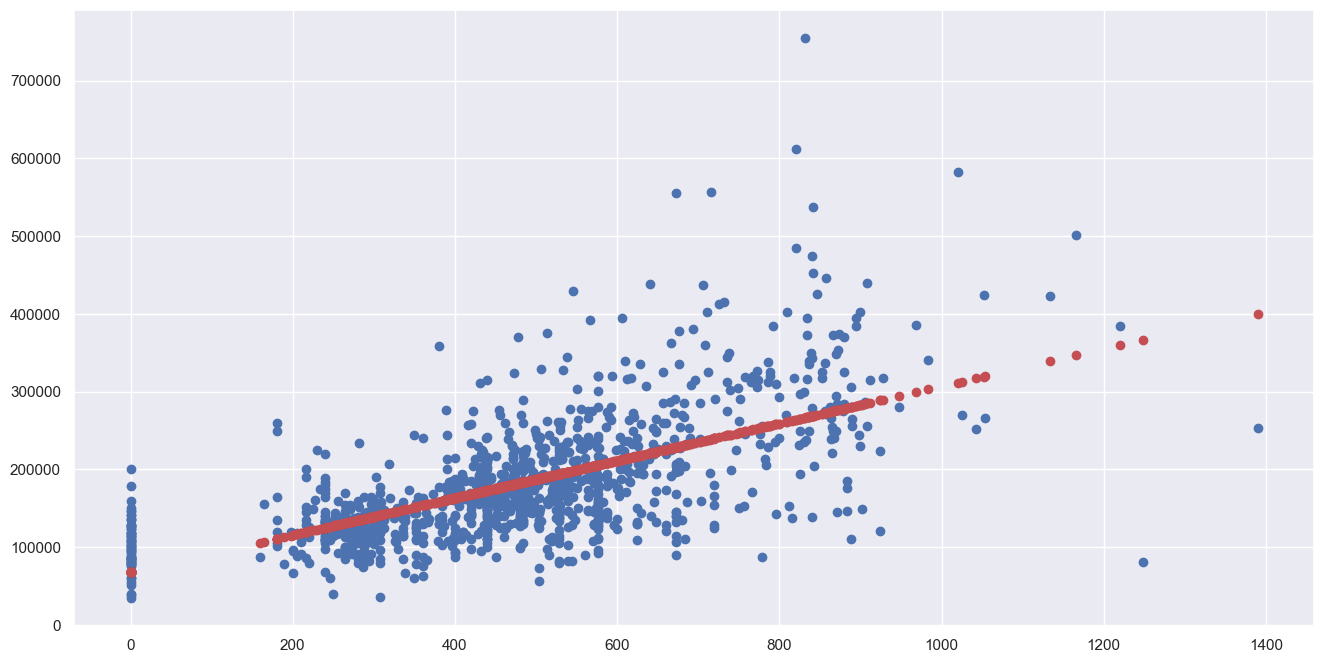

Explained Variance (R^2) 	: 0.4096572020731246
Mean Squared Error (MSE) 	: 3664019139.6328926
Root Mean Squared Error (RMSE) 	: 60531.14189929753

 Test the Linear Regression model linreg using the Test Set. 
 
Explained Variance (R^2) 	: 0.308759827459819
Mean Squared Error (MSE) 	: 4635020785.1034565
Root Mean Squared Error (RMSE) 	: 68080.98695747188


In [100]:
# Check the sample sizes
print("Train Set :", GarageArea_train.shape, SalePrice_train.shape)
print("Test Set  :", GarageArea_test.shape, SalePrice_test.shape)
print("Total:",1168+292, "\n")

linreg = LinearRegression()

linreg.fit(GarageArea_train,SalePrice_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = GarageArea_train
regline_y = linreg.intercept_ + linreg.coef_ * GarageArea_train

# Plot the Linear Regression line based on the coefficients-intercept form.
f = plt.figure(figsize=(16, 8))
plt.scatter(GarageArea_train, SalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Predict Total values corresponding to HP Train
SalePrice_train_pred = linreg.predict(GarageArea_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GarageArea_train, SalePrice_train)
plt.scatter(GarageArea_train, SalePrice_train_pred, color = "r")
plt.show()

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(GarageArea_train, SalePrice_train))

mse = mean_sq_err(SalePrice_train, SalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

# Check how good the predictions are on the Test Set.    
# Metrics : Explained Variance and Mean Squared Error.

# Predict Total values corresponding to HP Test
print("\n Test the Linear Regression model linreg using the Test Set. \n ")

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(GarageArea_test, SalePrice_test))
SalePrice_test_pred = linreg.predict(GarageArea_test)

mse = mean_sq_err(SalePrice_test, SalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

### Problem 3 : Refining the Models to Predict SalePrice

In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.

(a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea
UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

(b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on
the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

(c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.
Hints and Pointers

o In Part (a), there are houses that are outliers on both variables (intersection), but we really want the “union”.

o Part (b) is the same as Problem 1, just on the new outlier-free dataset. Check that the data now has less rows.

o Part (c) is the same as Problem 2, but keep in mind that the dataset has changed in this case, not the variables.